In [43]:
library(ggplot2)
library(readxl)
library(yaml)
library(tidyverse)
library(ggpol)

theme_set(theme_bw(base_size=16))
options(repr.plot.width=15, repr.plot.height=15)

yaml <- read_yaml("/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

### CIRCULAR BARPLOT

Tissue,Abbrev,Color,Samples,Up exons,Down exons,Total,group,log_value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adipose - Subcutaneous,ADPSBQ,#FF6600,581,4,13,17,A,1.2304489
Adipose - Visceral (Omentum),ADPVSC,#FFAA00,469,1,4,5,A,0.6989700
Adrenal Gland,ADRNLG,#33DD33,233,7,0,7,A,0.8450980
Artery - Aorta,ARTAORT,#FF5555,387,7,5,12,A,1.0791812
Artery - Coronary,ARTCRN,#FFAA99,213,3,5,8,A,0.9030900
Artery - Tibial,ARTTBL,#FF0000,584,13,14,27,A,1.4313638
Bladder,BLADDER,#A90000,NA,18,12,30,A,1.4771213
Brain - Amygdala,BRNAMY,#EEEE00,129,5,9,14,A,1.1461280
Brain - Anterior cingulate cortex (BA24),BRNACC,#EEEE00,147,23,8,31,A,1.4913617


Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”


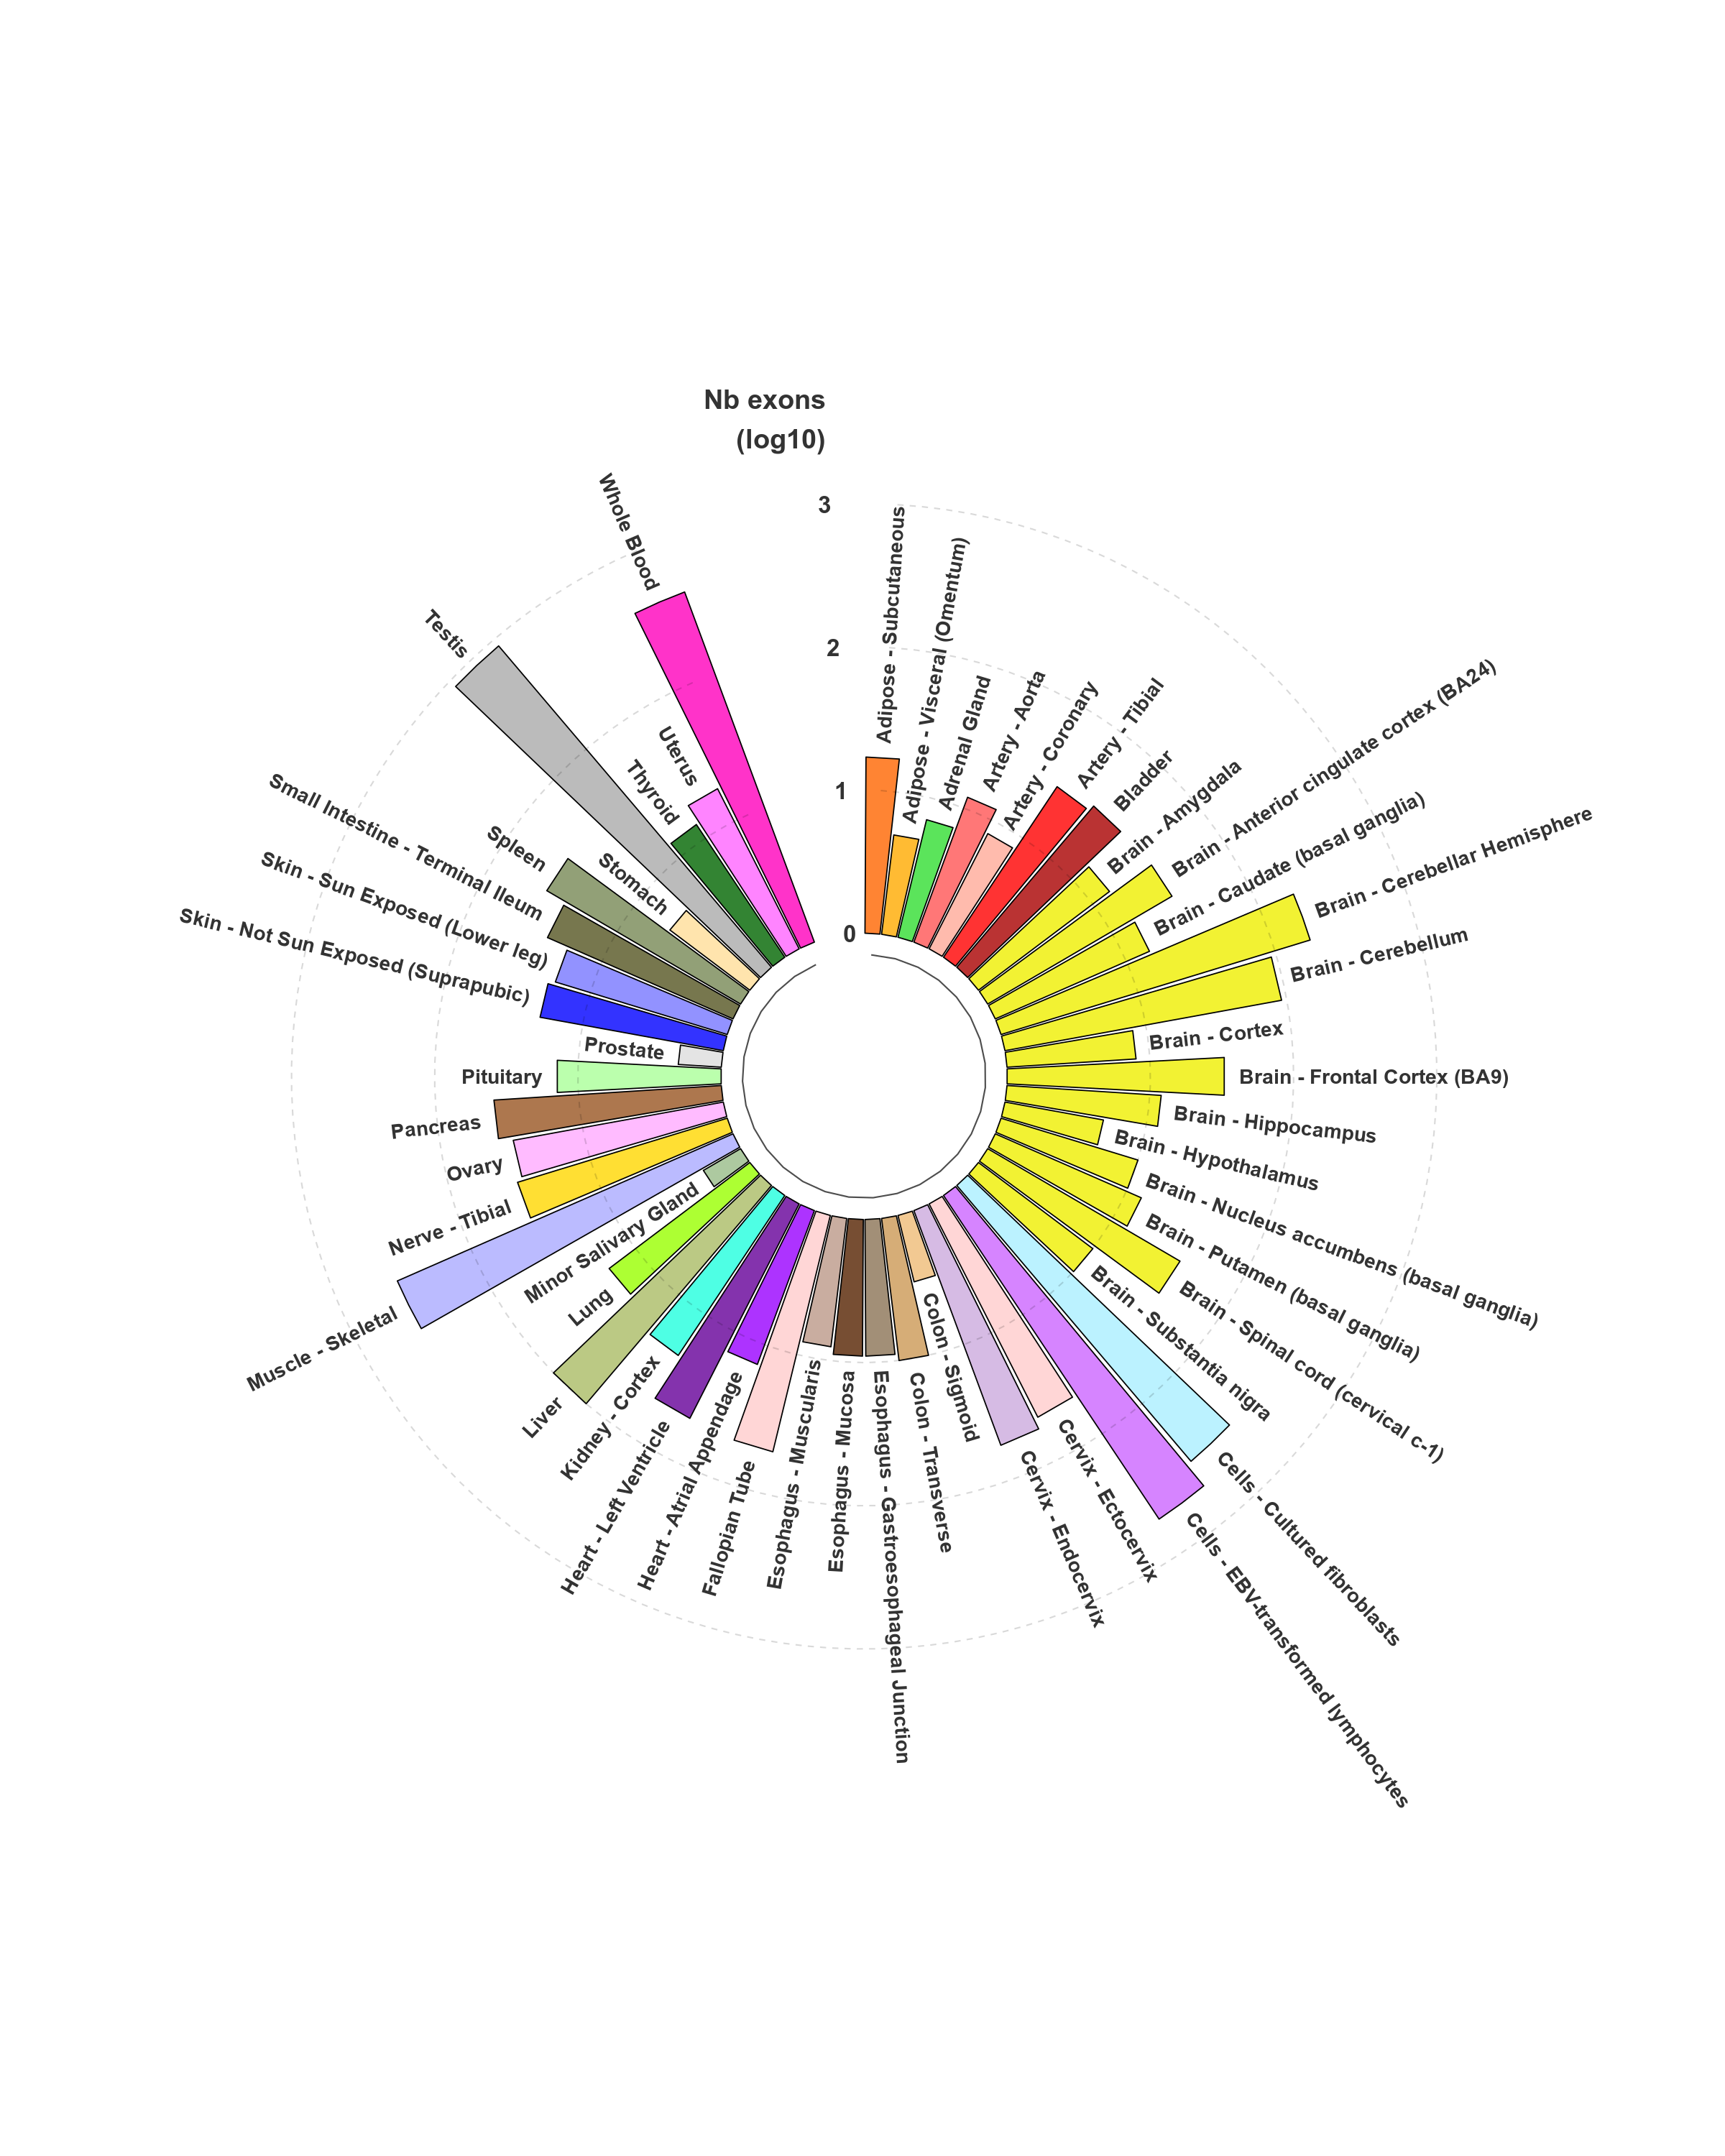

In [47]:
# Loading

w = 20
h = 25

options(repr.plot.width=w, repr.plot.height=h)

# colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))

output_path <- yaml$"4_DEXT"$"Figures_data"$"dext_circular_barplot"


# xlsx files
data <- read_excel(output_path)
data
data <- data[data$Total > 1, ]


# colors
 
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*length(unique(data$group)), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 


# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=log_value)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=log_value, fill=Tissue), stat="identity",  colour='black', alpha=0.8)  + scale_fill_manual(values=data$Color) + 
   
  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(0, 1, 2, 3), label = c("0", "1", "2", "3") , color="black", alpha=0.8, size=7 , angle=0, fontface="bold", hjust=1)  +
  annotate("text", x = rep(max(data$id),1), y = c(3.6), label = c("Nb exons\n(log10)") , color="black", alpha=0.8, size=8 , angle=0, fontface="bold", hjust=1)  +
  
  ylim(-1,4) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  geom_text(data=label_data, aes(x=id, y=log_value+0.1, label=Tissue, hjust=hjust), color="black", fontface="bold",alpha=0.8, size=6, angle= label_data$angle, inherit.aes = FALSE ) +
  
#   # Add base line information
    geom_segment(data=base_data, aes(x = start, y = 0 - 0.15, xend = end, yend = 0-0.15), colour = "black", alpha=0.7, size=0.6 , inherit.aes = FALSE)  +
    geom_segment(data=base_data, aes(x = start, y = 1, xend = end, yend = 1), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  +
    geom_segment(data=base_data, aes(x = start, y = 2, xend = end, yend = 2), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE  , linetype=2) + 
    geom_segment(data=base_data, aes(x = start, y = 3, xend = end, yend = 3), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  
# jpeg("/gstock/EXOTIC/clean/FIGURES/1_circular_barplot.jpg", width = 7000, height = 5000, res=300)

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
# base_data

for (format in c('png', 'jpg')){
    for (dpi in c(150, 300)){          
        output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
        ggsave(output_path_update, dpi=dpi, width = w, height = h)
    }
}

p


Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”


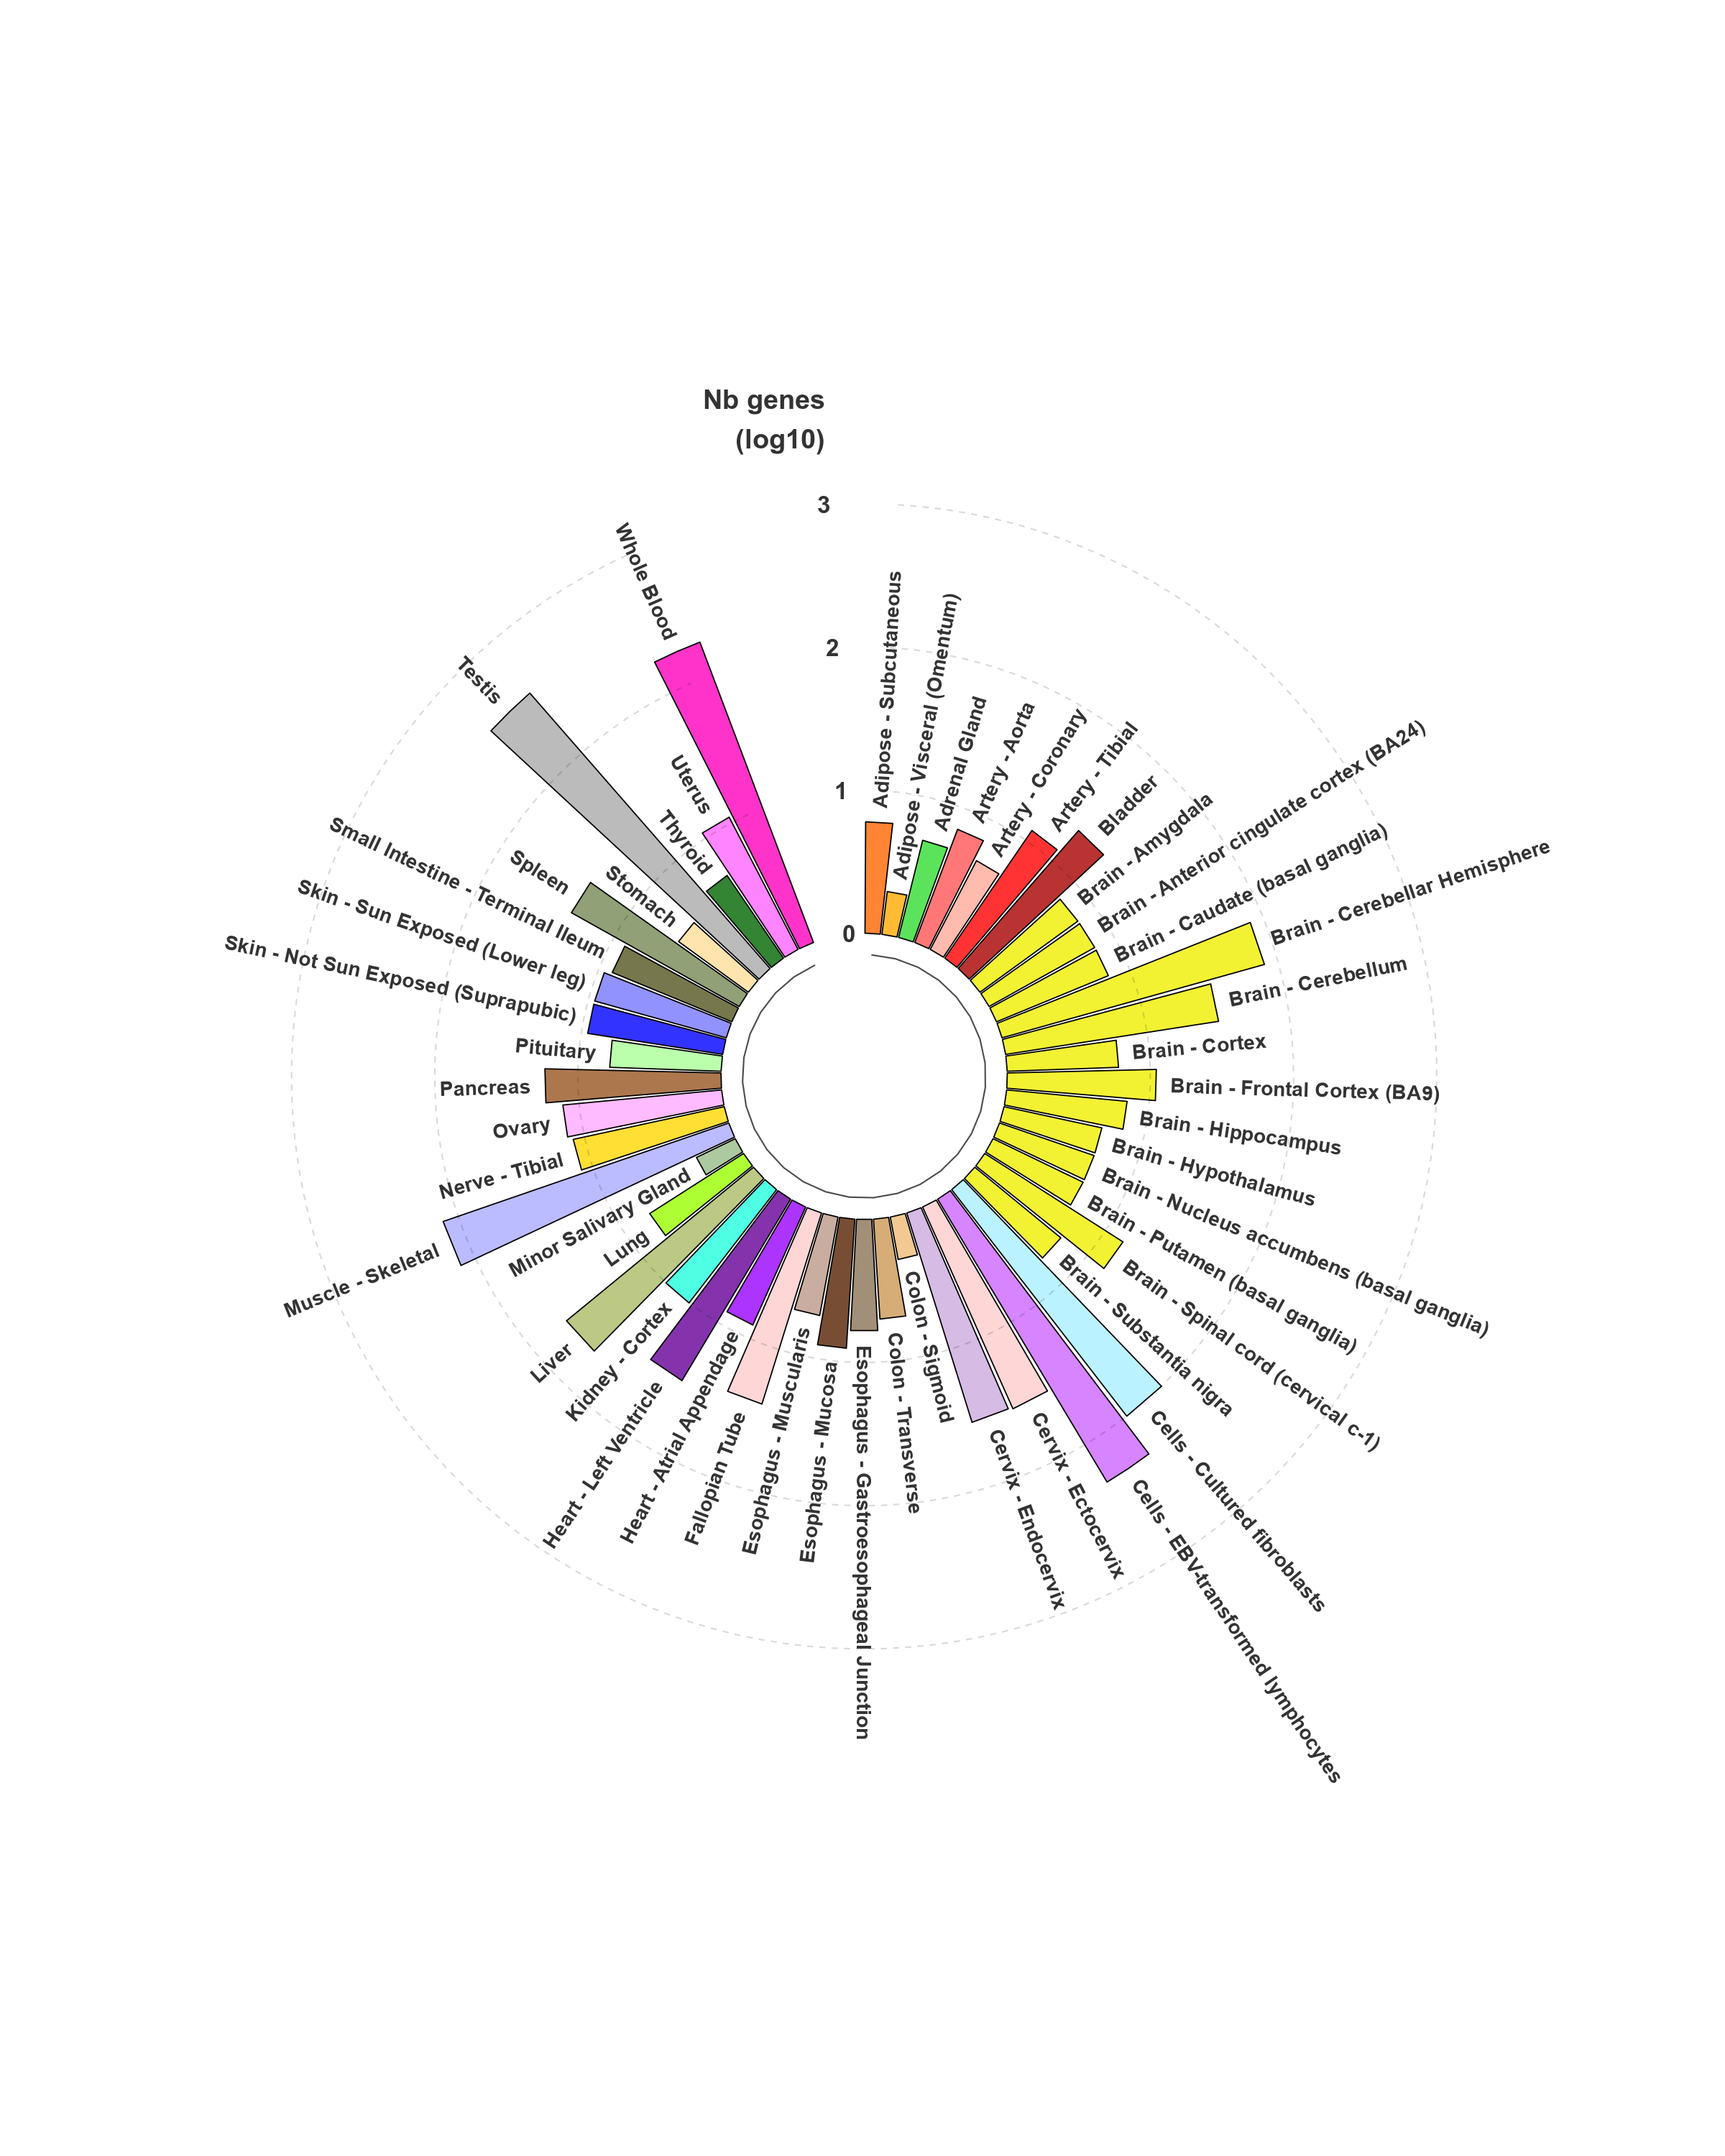

In [48]:
# Loading


w = 20
h = 25

options(repr.plot.width=w, repr.plot.height=h)

# colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))

output_path <- yaml$"4_DEXT"$"Figures_data"$"dext_circular_barplot_genes"


# xlsx files
data <- read_excel(output_path)
data <- data[data$Total > 1, ]


# colors
 
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*length(unique(data$group)), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 


# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=log_value)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=log_value, fill=Tissue), stat="identity",  colour='black', alpha=0.8)  + scale_fill_manual(values=data$Color) + 
   
  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(0, 1, 2, 3), label = c("0", "1", "2", "3") , color="black", alpha=0.8, size=7 , angle=0, fontface="bold", hjust=1)  +
  annotate("text", x = rep(max(data$id),1), y = c(3.6), label = c("Nb genes\n(log10)") , color="black", alpha=0.8, size=8 , angle=0, fontface="bold", hjust=1)  +
  
  ylim(-1,4) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  geom_text(data=label_data, aes(x=id, y=log_value+0.1, label=Tissue, hjust=hjust), color="black", fontface="bold",alpha=0.8, size=6, angle= label_data$angle, inherit.aes = FALSE ) +
  
#   # Add base line information
    geom_segment(data=base_data, aes(x = start, y = 0 - 0.15, xend = end, yend = 0-0.15), colour = "black", alpha=0.7, size=0.6 , inherit.aes = FALSE)  +
    geom_segment(data=base_data, aes(x = start, y = 1, xend = end, yend = 1), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  +
    geom_segment(data=base_data, aes(x = start, y = 2, xend = end, yend = 2), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE  , linetype=2) + 
    geom_segment(data=base_data, aes(x = start, y = 3, xend = end, yend = 3), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  
# jpeg("/gstock/EXOTIC/clean/FIGURES/1_circular_barplot.jpg", width = 7000, height = 5000, res=300)

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
# base_data

for (format in c('png', 'jpg')){
    for (dpi in c(150, 300)){          
        output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
        ggsave(output_path_update, dpi=dpi, width = w, height = h)
    }
}

p


In [6]:
data

Tissue,Abbrev,Color,Samples,variable,value
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Adipose - Subcutaneous,ADPSBQ,#FF6600,581,dext_tissues_up,28
Adipose - Subcutaneous,ADPSBQ,#FF6600,581,dext_tissues_down,15
Adipose - Visceral (Omentum),ADPVSC,#FFAA00,469,dext_tissues_up,4
Adipose - Visceral (Omentum),ADPVSC,#FFAA00,469,dext_tissues_down,10
Adrenal Gland,ADRNLG,#33DD33,233,dext_tissues_up,10
Adrenal Gland,ADRNLG,#33DD33,233,dext_tissues_down,9
Artery - Aorta,ARTAORT,#FF5555,387,dext_tissues_up,31
Artery - Aorta,ARTAORT,#FF5555,387,dext_tissues_down,19
Artery - Coronary,ARTCRN,#FFAA99,213,dext_tissues_up,21


[1] "Whole Blood"                              
 [2] "Uterus"                                   
 [3] "Thyroid"                                  
 [4] "Testis"                                   
 [5] "Stomach"                                  
 [6] "Spleen"                                   
 [7] "Small Intestine - Terminal Ileum"         
 [8] "Skin - Sun Exposed (Lower leg)"           
 [9] "Skin - Not Sun Exposed (Suprapubic)"      
[10] "Prostate"                                 
[11] "Pituitary"                                
[12] "Pancreas"                                 
[13] "Ovary"                                    
[14] "Nerve - Tibial"                           
[15] "Muscle - Skeletal"                        
[16] "Minor Salivary Gland"                     
[17] "Lung"                                     
[18] "Liver"                                    
[19] "Kidney - Cortex"                          
[20] "Heart - Left Ventricle"                   
[21] "Heart - Atrial Appendage"                 
[22] "Fallopian Tube"                           
[23] "Esophagus - Muscularis"                   
[24] "Esophagus - Mucosa"                       
[25] "Esophagus - Gastroesophageal Junction"    
[26] "Colon - Transverse"                       
[27] "Colon - Sigmoid"                          
[28] "Cervix - Endocervix"                      
[29] "Cervix - Ectocervix"                      
[30] "Cells - EBV-transformed lymphocytes"      
[31] "Cells - Cultured fibroblasts"             
[32] "Breast - Mammary Tissue"                  
[33] "Brain - Substantia nigra"                 
[34] "Brain - Spinal cord (cervical c-1)"       
[35] "Brain - Putamen (basal ganglia)"          
[36] "Brain - Nucleus accumbens (basal ganglia)"
[37] "Brain - Hypothalamus"                     
[38] "Brain - Hippocampus"                      
[39] "Brain - Frontal Cortex (BA9)"             
[40] "Brain - Cortex"                           
[41] "Brain - Cerebellum"                       
[42] "Brain - Cerebellar Hemisphere"            
[43] "Brain - Caudate (basal ganglia)"          
[44] "Brain - Anterior cingulate cortex (BA24)" 
[45] "Brain - Amygdala"                         
[46] "Bladder"                                  
[47] "Artery - Tibial"                          
[48] "Artery - Coronary"                        
[49] "Artery - Aorta"                           
[50] "Adrenal Gland"                            
[51] "Adipose - Visceral (Omentum)"             
[52] "Adipose - Subcutaneous"

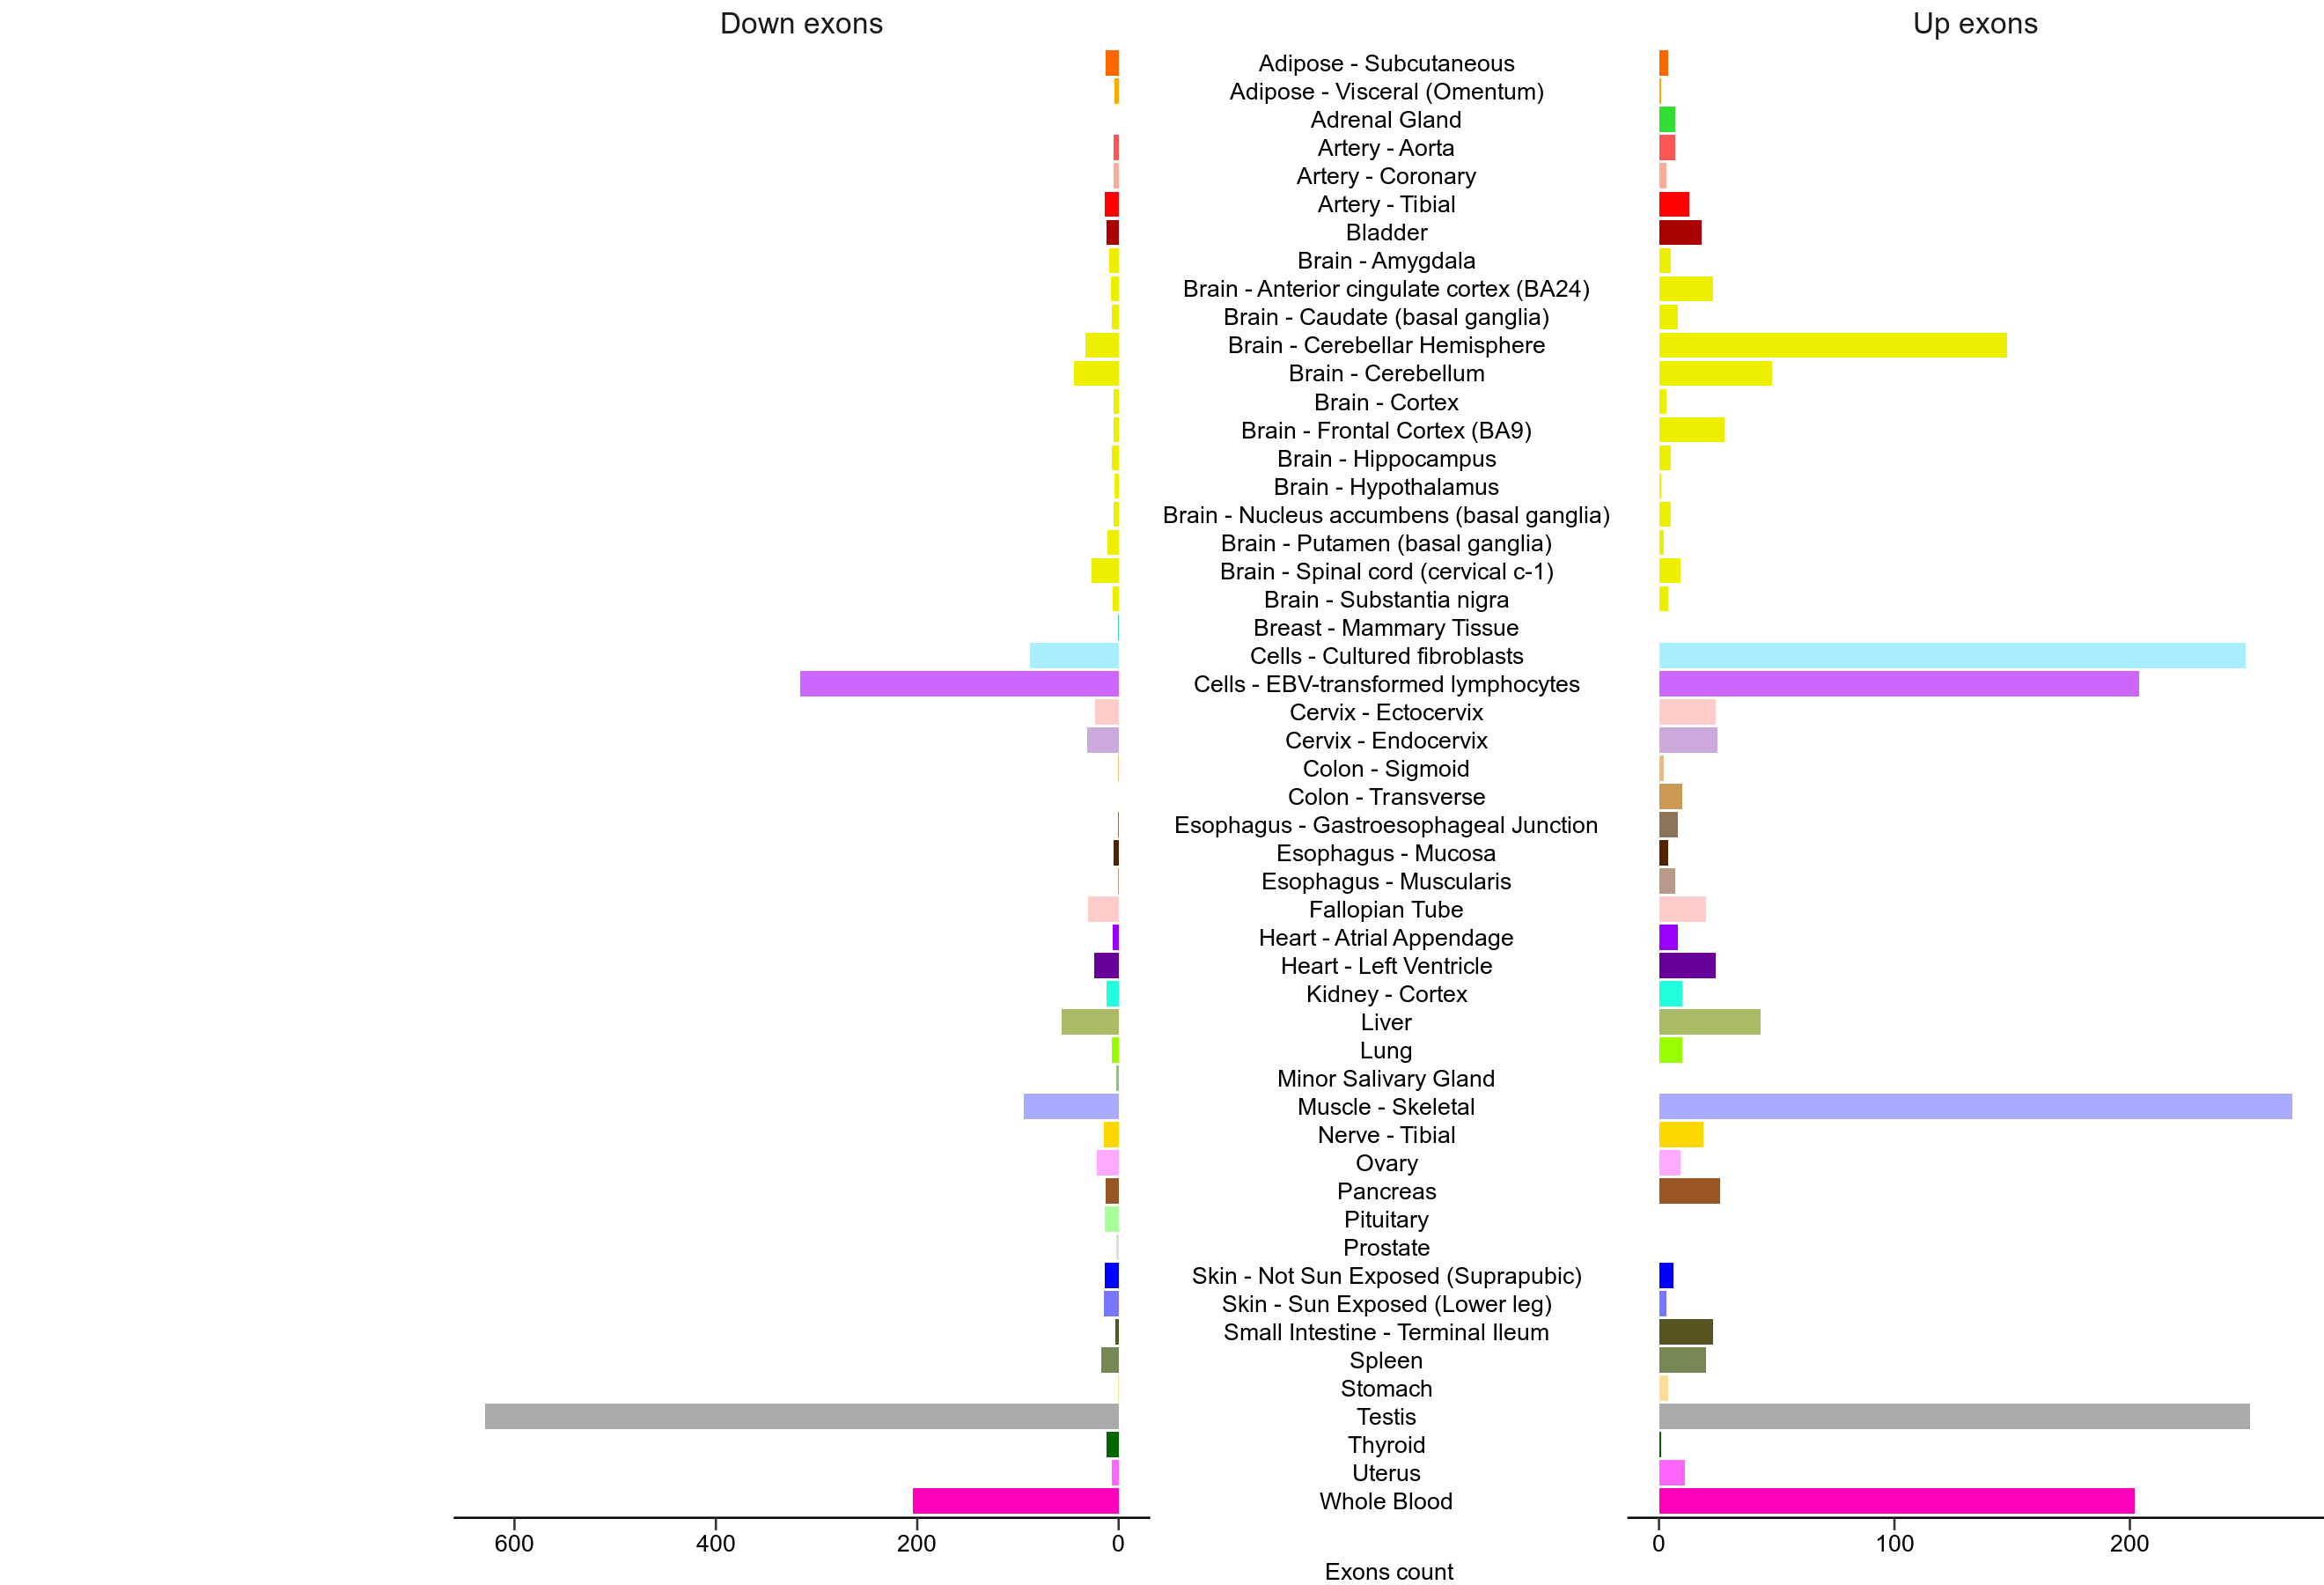

In [58]:

w = 22
h = 15

options(repr.plot.width=w, repr.plot.height=h)

output_path <- yaml$"4_DEXT"$"Figures_data"$"dext_vertical_barplot"
data <- read_excel(output_path)

colors <- read_excel(yaml$"4_DEXT"$"External"$"gtex_colors")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% data$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)
rev(unique(data$Tissue))

p <- ggplot(data, aes(x = factor(Tissue), y = value, fill = Tissue)) + 
    geom_bar(stat = "identity") +
    facet_share(~variable, dir = "h", scales = "free", reverse_num = TRUE) +  
    scale_x_discrete(limits = rev(unique(data$Tissue))) +
    scale_y_continuous() +
    coord_flip() +
    labs(x = "", y = "Exons count") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)



for (format in c('png', 'jpg')){
    for (dpi in c(150, 300)){          
        output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
        ggsave(output_path_update, dpi=dpi, width = w, height = h)
    }
}

p

Tissue,dext_tissues_up,dext_tissues_down,total,diff,ratio_up_exons,ratio_down_exons,Up genes,Down genes,total_genes,ratio_up_genes,ratio_down_genes,diff_genes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breast - Mammary Tissue,0,1,1,-1.000000000,0.00000000,1.0000000,0,1,1,0.0000000,1.0000000,-1.000000000
Minor Salivary Gland,0,2,2,-1.000000000,0.00000000,1.0000000,0,2,2,0.0000000,1.0000000,-1.000000000
Pituitary,0,14,14,-1.000000000,0.00000000,1.0000000,0,6,6,0.0000000,1.0000000,-1.000000000
Prostate,0,2,2,-1.000000000,0.00000000,1.0000000,0,1,1,0.0000000,1.0000000,-1.000000000
Thyroid,1,12,13,-0.846153846,0.07692308,0.9230769,1,4,5,0.2000000,0.8000000,-0.600000000
Brain - Putamen (basal ganglia),2,11,13,-0.692307692,0.15384615,0.8461538,1,4,5,0.2000000,0.8000000,-0.600000000
Skin - Sun Exposed (Lower leg),3,15,18,-0.666666667,0.16666667,0.8333333,3,6,9,0.3333333,0.6666667,-0.333333333
Adipose - Visceral (Omentum),1,4,5,-0.600000000,0.20000000,0.8000000,1,1,2,0.5000000,0.5000000,0.000000000
Brain - Hypothalamus,1,4,5,-0.600000000,0.20000000,0.8000000,1,4,5,0.2000000,0.8000000,-0.600000000


[1] "Colon - Transverse"                       
 [2] "Adrenal Gland"                            
 [3] "Esophagus - Gastroesophageal Junction"    
 [4] "Small Intestine - Terminal Ileum"         
 [5] "Esophagus - Muscularis"                   
 [6] "Brain - Frontal Cortex (BA9)"             
 [7] "Brain - Cerebellar Hemisphere"            
 [8] "Stomach"                                  
 [9] "Brain - Anterior cingulate cortex (BA24)" 
[10] "Muscle - Skeletal"                        
[11] "Cells - Cultured fibroblasts"             
[12] "Pancreas"                                 
[13] "Colon - Sigmoid"                          
[14] "Uterus"                                   
[15] "Bladder"                                  
[16] "Lung"                                     
[17] "Artery - Aorta"                           
[18] "Heart - Atrial Appendage"                 
[19] "Nerve - Tibial"                           
[20] "Spleen"                                   
[21] "Brain - Caudate (basal ganglia)"          
[22] "Brain - Cerebellum"                       
[23] "Cervix - Ectocervix"                      
[24] "Heart - Left Ventricle"                   
[25] "Brain - Nucleus accumbens (basal ganglia)"
[26] "Whole Blood"                              
[27] "Artery - Tibial"                          
[28] "Kidney - Cortex"                          
[29] "Cervix - Endocervix"                      
[30] "Esophagus - Mucosa"                       
[31] "Liver"                                    
[32] "Brain - Hippocampus"                      
[33] "Fallopian Tube"                           
[34] "Brain - Substantia nigra"                 
[35] "Cells - EBV-transformed lymphocytes"      
[36] "Brain - Cortex"                           
[37] "Artery - Coronary"                        
[38] "Brain - Amygdala"                         
[39] "Skin - Not Sun Exposed (Suprapubic)"      
[40] "Ovary"                                    
[41] "Testis"                                   
[42] "Brain - Spinal cord (cervical c-1)"       
[43] "Adipose - Subcutaneous"                   
[44] "Brain - Hypothalamus"                     
[45] "Adipose - Visceral (Omentum)"             
[46] "Skin - Sun Exposed (Lower leg)"           
[47] "Brain - Putamen (basal ganglia)"          
[48] "Thyroid"                                  
[49] "Prostate"                                 
[50] "Pituitary"                                
[51] "Minor Salivary Gland"                     
[52] "Breast - Mammary Tissue"

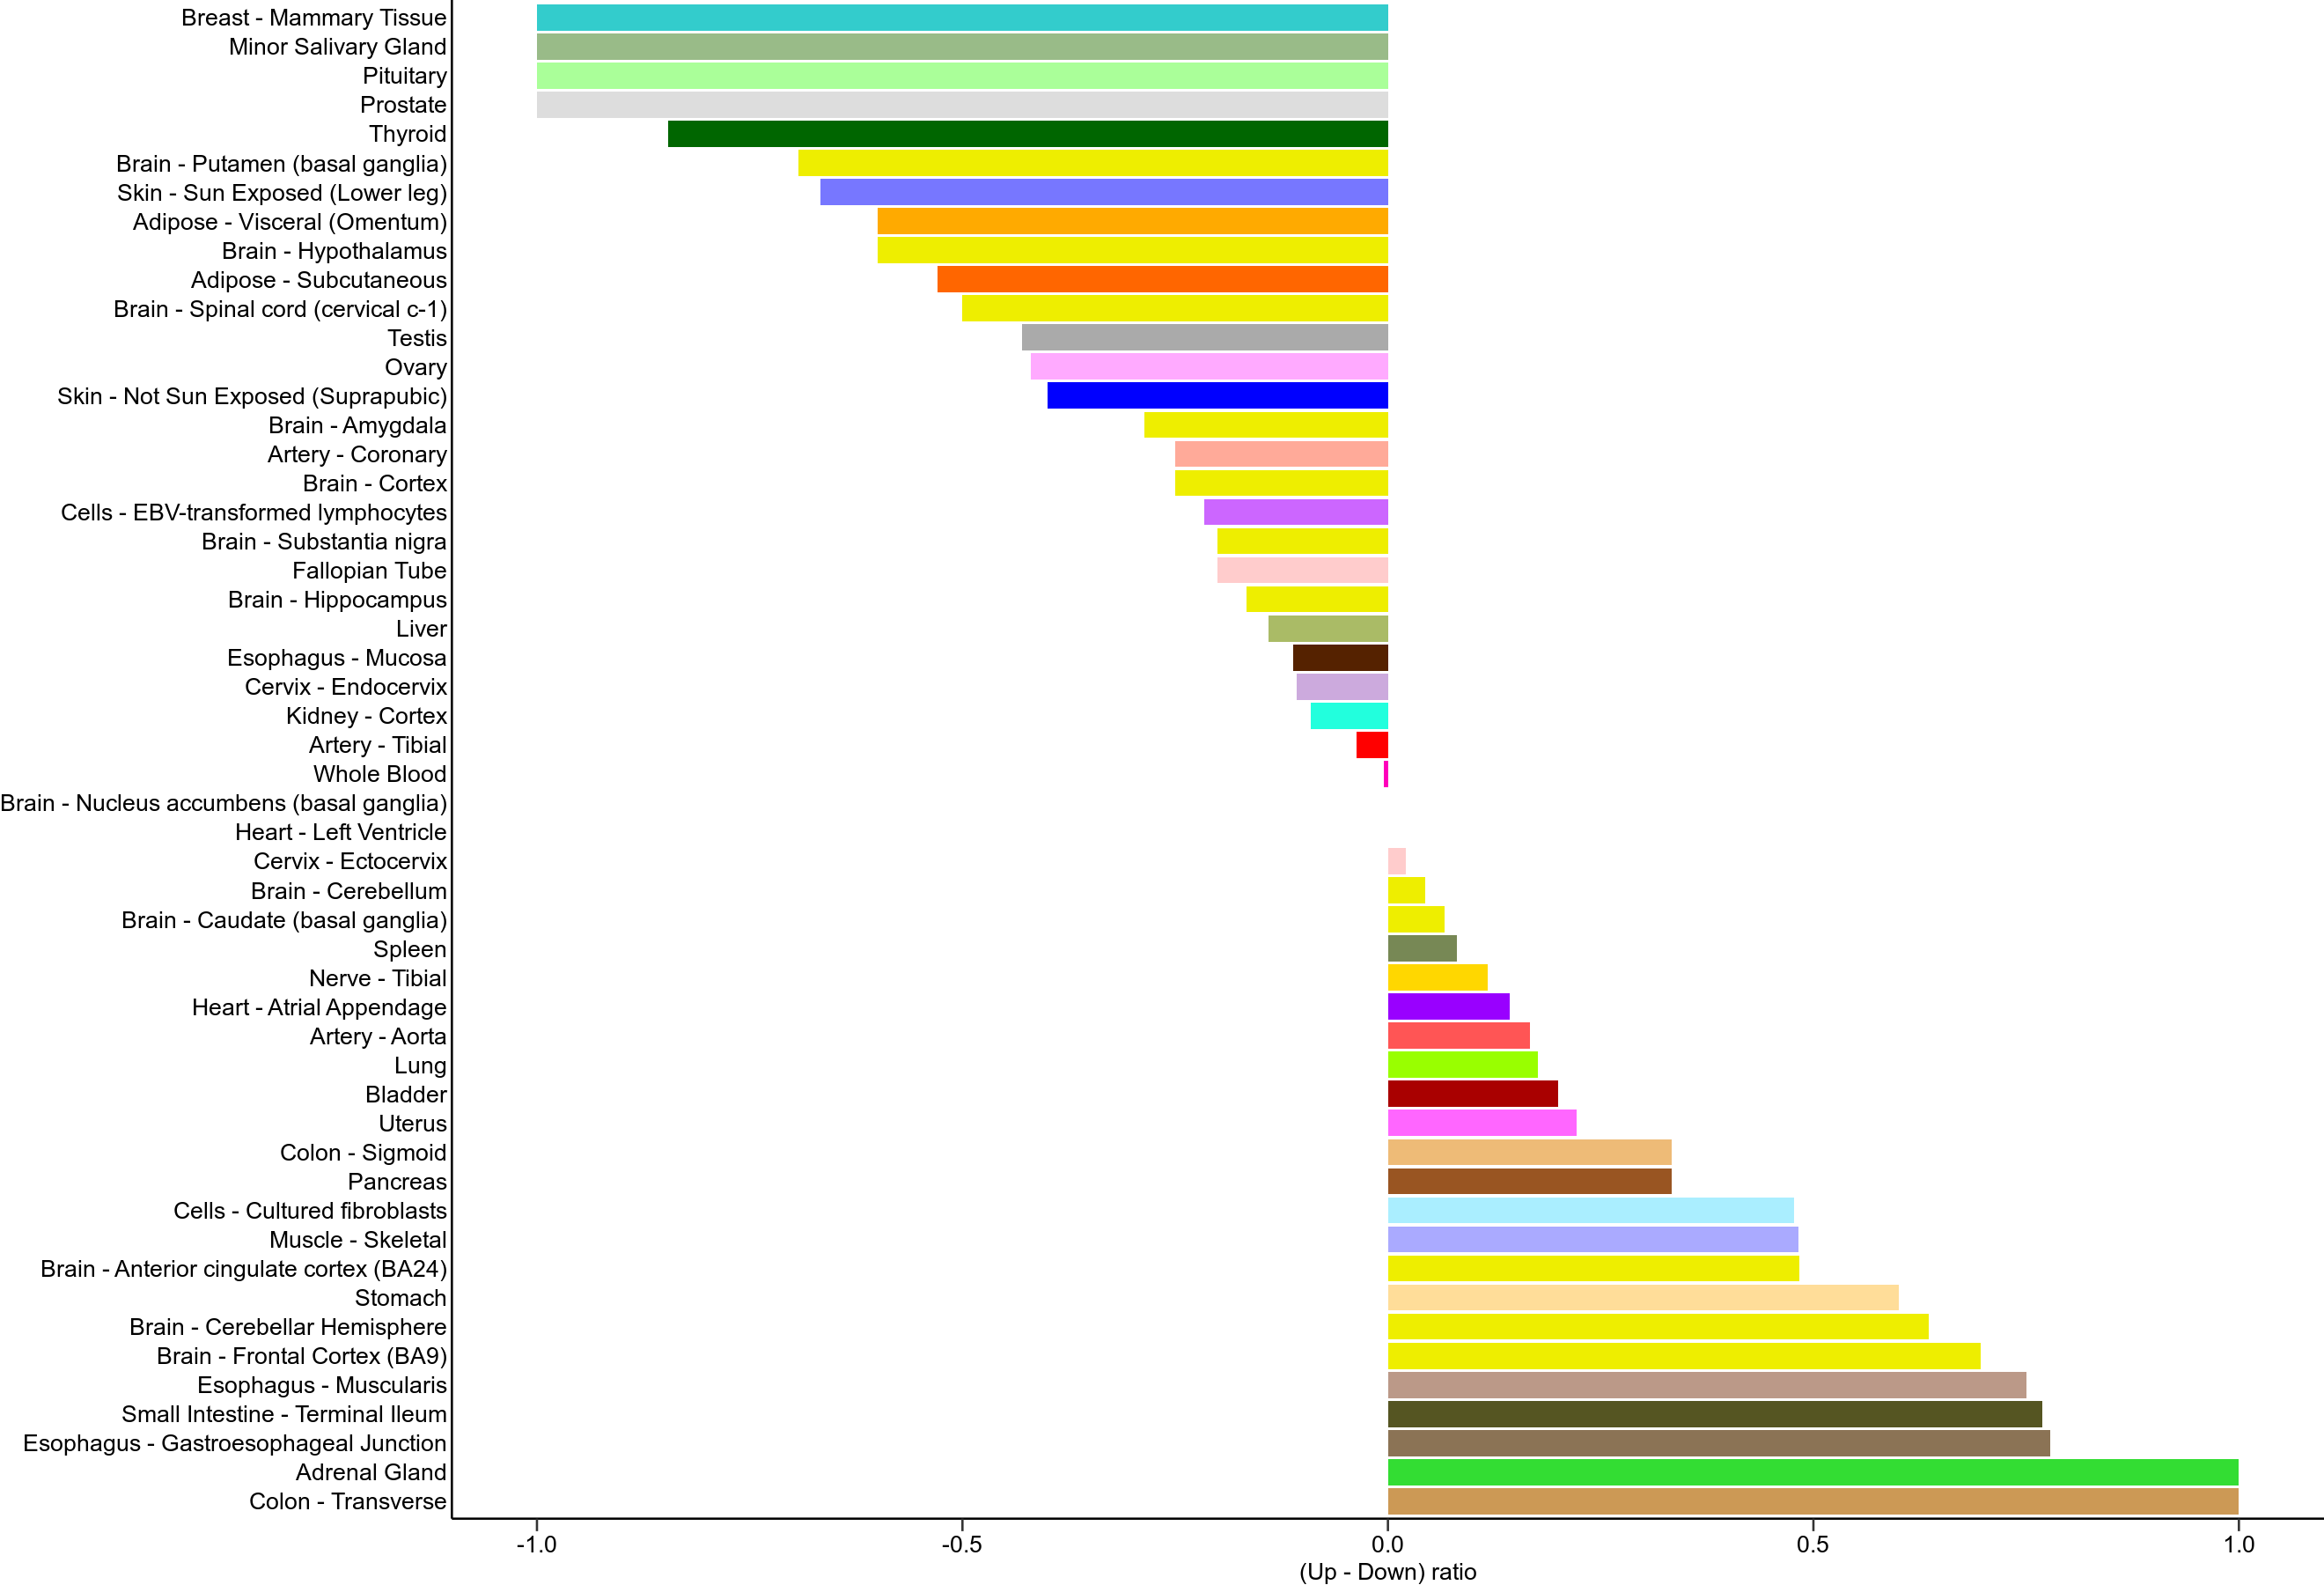

In [57]:

w = 22
h = 15

options(repr.plot.width=w, repr.plot.height=h)

output_path <- yaml$"4_DEXT"$"Figures_data"$"dext_diff_barplot"
data <- read_excel(output_path)
# data <- data[data['total'] > 50, ]
data <- data[order(data$diff),]
data

colors <- read_excel(yaml$"4_DEXT"$"External"$"gtex_colors")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% data$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)
rev(unique(data$Tissue))

p <- ggplot(data, aes(x = factor(Tissue), y = diff, fill = Tissue)) + 
    geom_bar(stat = "identity") +
#     facet_share(~variable, dir = "h", scales = "free", reverse_num = TRUE) +  
    scale_x_discrete(limits = rev(unique(data$Tissue))) +
#     scale_y_continuous(limits = c(-900,0,0,900)) +
    coord_flip() +
    labs(x = "", y = "(Up - Down) ratio") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)



# for (format in c('png', 'jpg')){
#     for (dpi in c(150, 300)){          
#         output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
#         ggsave(output_path_update, dpi=dpi, width = w, height = h)
#     }
# }

p

Tissue,dext_tissues_up,dext_tissues_down,total,diff,ratio_up_exons,ratio_down_exons,Up genes,Down genes,total_genes,ratio_up_genes,ratio_down_genes,diff_genes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pituitary,0,14,14,-100.00000,0.00000000,1.0000000,0,6,6,0.0000000,1.0000000,-1.0000000
Thyroid,1,12,13,-84.61538,0.07692308,0.9230769,1,4,5,0.2000000,0.8000000,-0.6000000
Brain - Putamen (basal ganglia),2,11,13,-69.23077,0.15384615,0.8461538,1,4,5,0.2000000,0.8000000,-0.6000000
Skin - Sun Exposed (Lower leg),3,15,18,-66.66667,0.16666667,0.8333333,3,6,9,0.3333333,0.6666667,-0.3333333
Brain - Hypothalamus,1,4,5,-60.00000,0.20000000,0.8000000,1,4,5,0.2000000,0.8000000,-0.6000000
Adipose - Subcutaneous,4,13,17,-52.94118,0.23529412,0.7647059,2,4,6,0.3333333,0.6666667,-0.3333333
Testis,251,629,880,-42.95455,0.28522727,0.7147727,135,222,357,0.3781513,0.6218487,-0.2436975
Brain - Amygdala,5,9,14,-28.57143,0.35714286,0.6428571,2,5,7,0.2857143,0.7142857,-0.4285714
Brain - Cortex,3,5,8,-25.00000,0.37500000,0.6250000,2,4,6,0.3333333,0.6666667,-0.3333333


[1] "Colon - Transverse"                   
 [2] "Adrenal Gland"                        
 [3] "Esophagus - Gastroesophageal Junction"
 [4] "Small Intestine - Terminal Ileum"     
 [5] "Esophagus - Muscularis"               
 [6] "Brain - Frontal Cortex (BA9)"         
 [7] "Brain - Cerebellar Hemisphere"        
 [8] "Stomach"                              
 [9] "Muscle - Skeletal"                    
[10] "Cells - Cultured fibroblasts"         
[11] "Uterus"                               
[12] "Brain - Cortex"                       
[13] "Brain - Amygdala"                     
[14] "Testis"                               
[15] "Adipose - Subcutaneous"               
[16] "Brain - Hypothalamus"                 
[17] "Skin - Sun Exposed (Lower leg)"       
[18] "Brain - Putamen (basal ganglia)"      
[19] "Thyroid"                              
[20] "Pituitary"

Warning message:
“Ignoring unknown parameters: height”
Warning message:
“Ignoring unknown parameters: height”


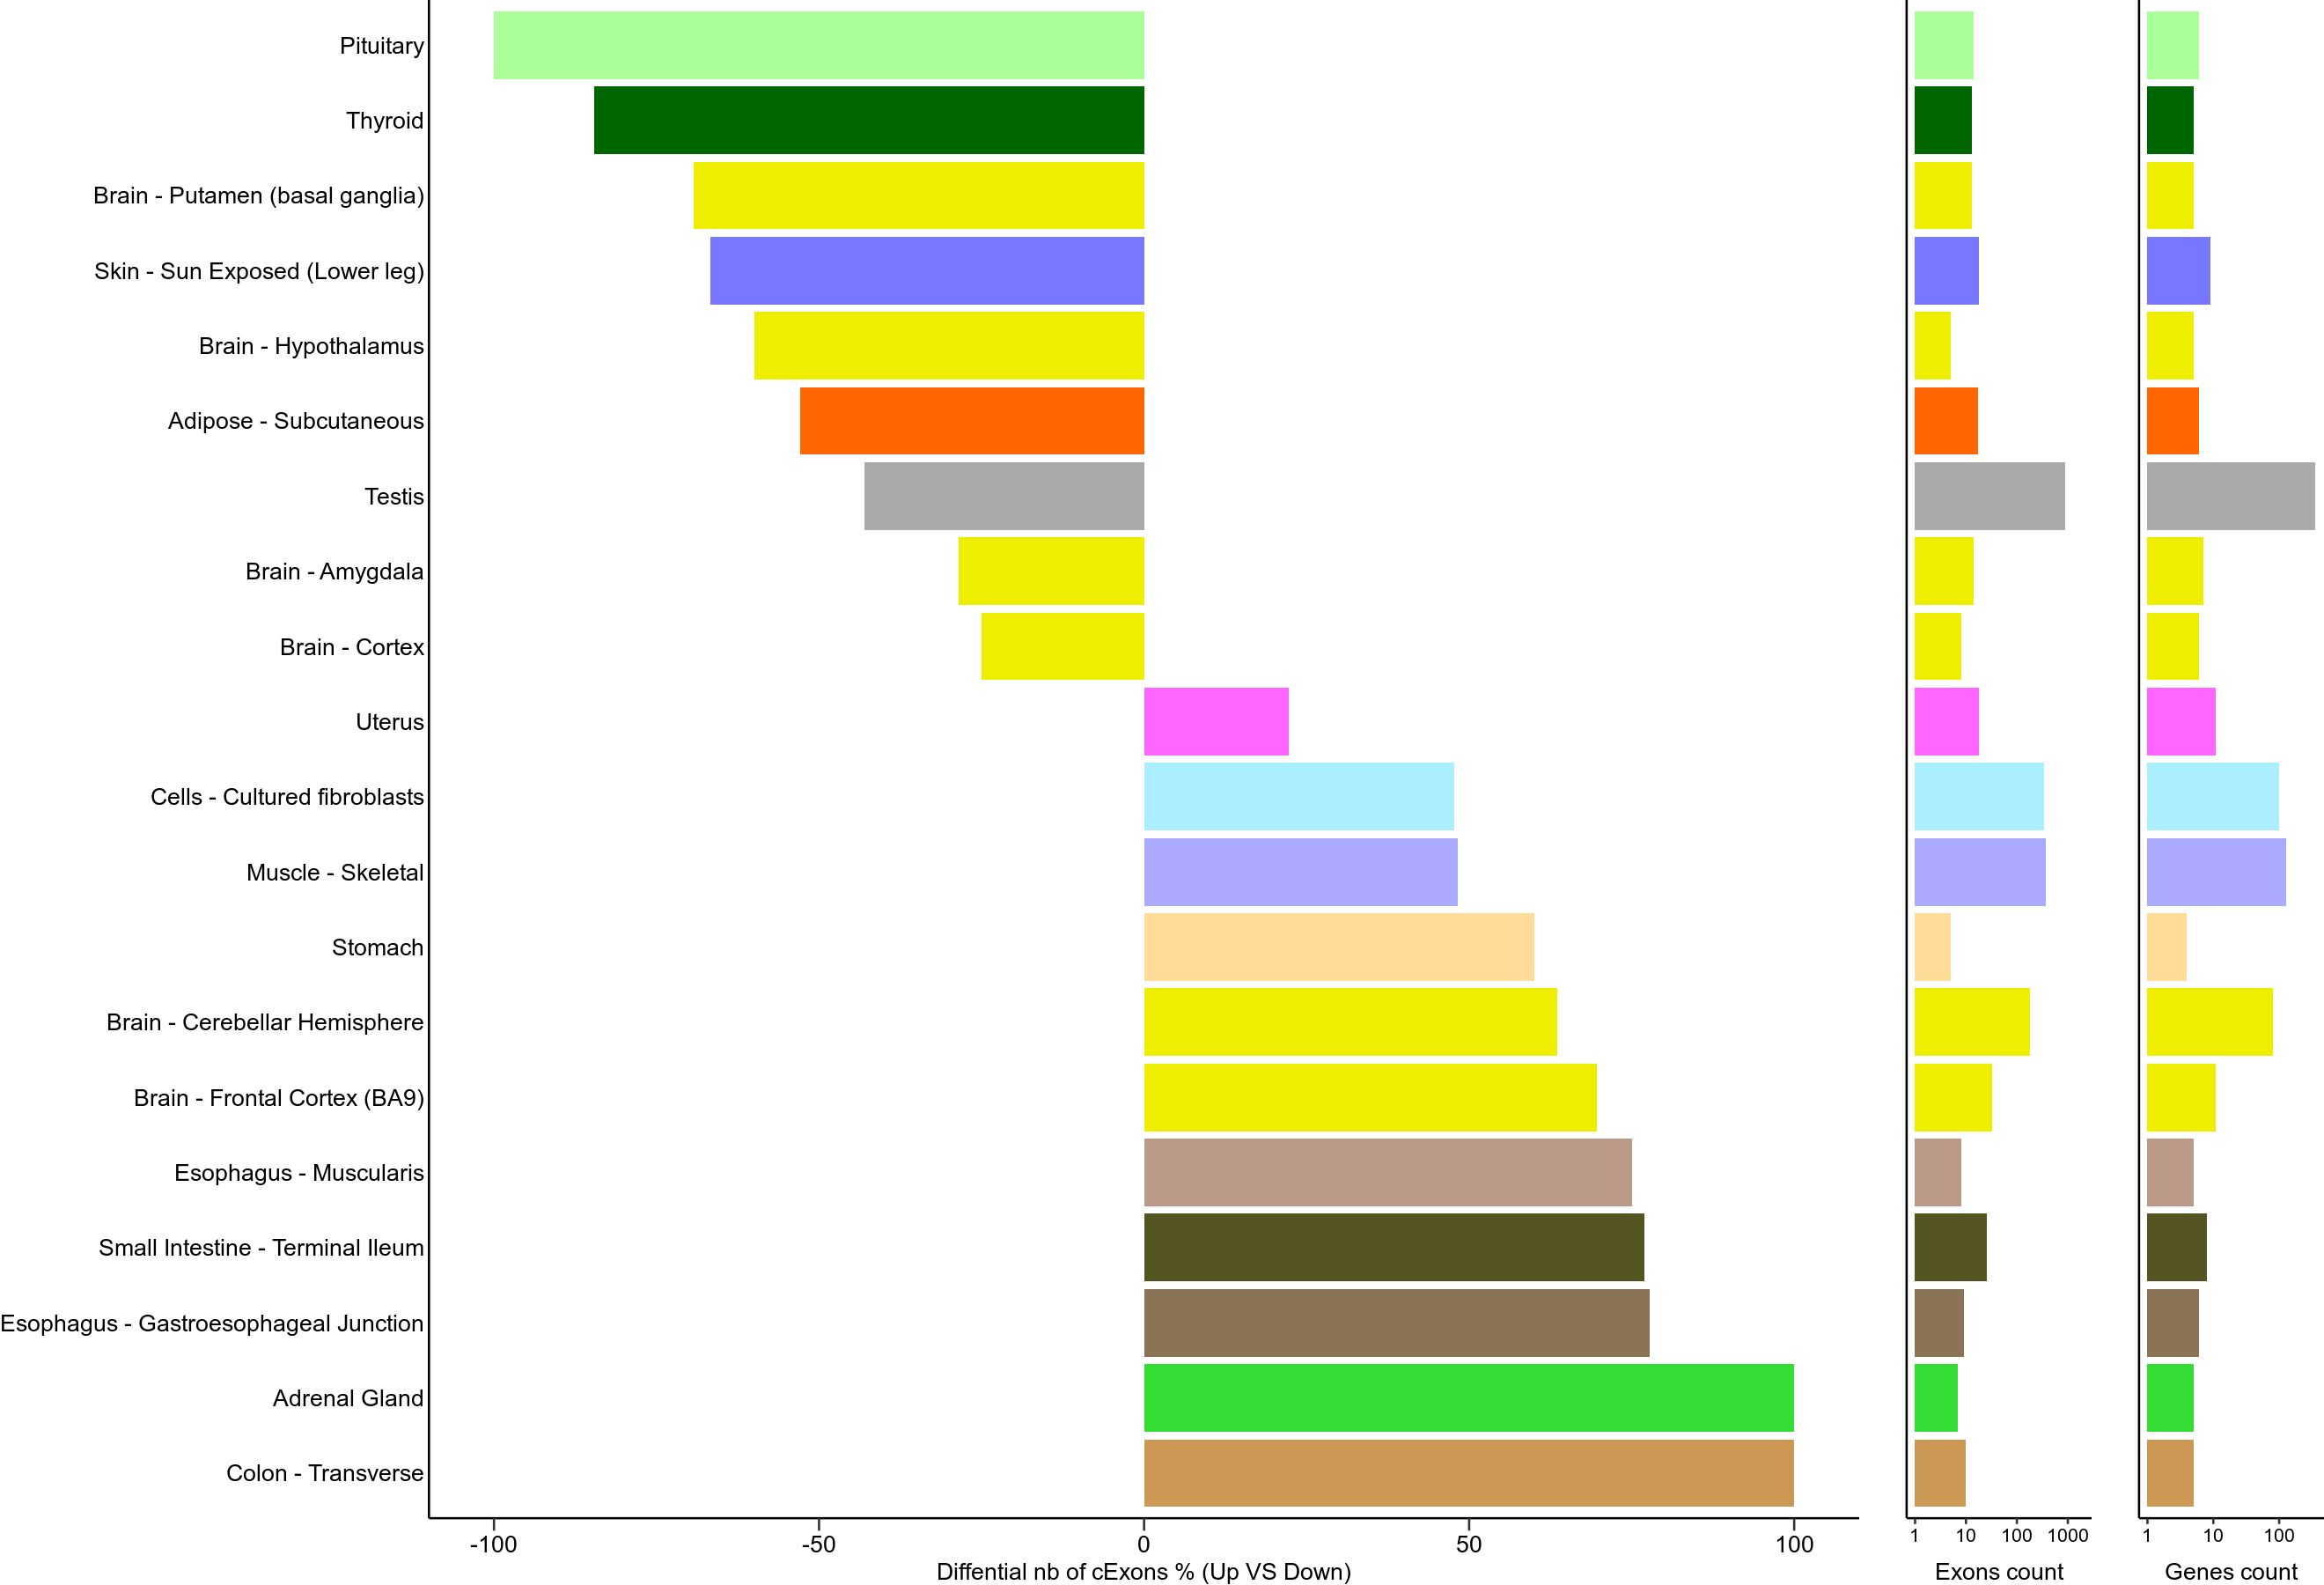

In [50]:
library(cowplot)

w = 22
h = 15

options(repr.plot.width=w, repr.plot.height=h)

output_path <- yaml$"4_DEXT"$"Figures_data"$"dext_diff_barplot"
data <- read_excel(output_path)
# data <- data[data['total'] > 50, ]
data <- data[order(data$diff),]
data$diff <- data$diff * 100
data

colors <- read_excel(yaml$"4_DEXT"$"External"$"gtex_colors")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% data$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)
rev(unique(data$Tissue))

p <- ggplot(data, aes(x = factor(Tissue), y = diff, fill = Tissue)) + 
    geom_bar(stat = "identity") +
#     facet_share(~variable, dir = "h", scales = "free", reverse_num = TRUE) +  
    scale_x_discrete(limits = rev(unique(data$Tissue))) +
#     scale_y_continuous(limits = c(-900,0,0,900)) +
    coord_flip() +
    labs(x = "", y = "Diffential nb of cExons % (Up VS Down)") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)


h2 <- ggplot(data)+
      geom_bar(mapping = aes(y=factor(Tissue), x=total, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(
          legend.position = "none", 
          axis.ticks.y = element_blank(), 
          axis.text.y = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"), 
          plot.margin=margin(l=1,unit="cm"), 
          panel.border = element_blank(), 
          axis.title.y=element_blank(), 
          axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(data$Tissue))) + 
    scale_x_continuous(trans='log10', limits=c(1,2000)) + xlab("Exons count")


h3 <- ggplot(data)+
      geom_bar(mapping = aes(y=factor(Tissue), x=total_genes, fill = Tissue, ),  
       stat = "identity", 
       height = 1, ) + 
#       theme_classic()+
      theme(
          legend.position = "none", 
          axis.ticks.y = element_blank(), 
          axis.text.y = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"), 
          plot.margin=margin(l=1,unit="cm"), 
          panel.border = element_blank(), 
          axis.title.y=element_blank(), 
          axis.text.x = element_text(color="black")
           ) + 
    scale_fill_manual(values=colors$Color) +  
    scale_y_discrete(limits = rev(unique(data$Tissue))) + 
    scale_x_continuous(trans='log10') + xlab("Genes count")
#      facet_grid(.~Tissue, scales = "free_x")
plot <- plot_grid(plotlist=list(p, h2, h3), align='h', ncol=3, rel_widths = c(8/10, 1/10, 1/10))



for (format in c('png', 'jpg')){
    for (dpi in c(150, 300)){          
        output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
        ggsave(output_path_update, dpi=dpi, width = w, height = h)
    }
}

plot